## Import libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import os

In [2]:
data = pd.DataFrame()
for file in os.listdir("./Desktop/Sales_Data"):
    df = pd.read_csv("./Desktop/Sales_Data/" + file)
    data = pd.concat([data, df])
data.to_csv("full_data.csv", index=False)

In [3]:
full_data = pd.read_csv("full_data.csv")

## Data Understanding

In [4]:
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
full_data.shape

(186850, 6)

In [6]:
full_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Cleaning data

In [8]:
#Look at "Quantity Ordered" column

In [9]:
full_data["Quantity Ordered"].unique()

array(['2', nan, '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8',
       '9'], dtype=object)

In [10]:
full_data[full_data["Quantity Ordered"] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
# There are 355 rows that contains weong data
# Delete rows that contains "Quantity Ordered" value 
full_data = full_data[full_data["Quantity Ordered"] != "Quantity Ordered"]

In [12]:
full_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [13]:
# All columns has the same 545 NA values
# Drop rows with NA values 
full_data.dropna(inplace=True)

In [14]:
full_data.duplicated().sum()

264

In [15]:
full_data.drop_duplicates(keep="first", inplace=True)

In [16]:
full_data.shape

(185686, 6)

In [17]:
# Convert type of multiple columns
full_data = full_data.astype({"Quantity Ordered": int, "Price Each": float})
full_data["Order Date"] = pd.to_datetime(full_data["Order Date"])

In [18]:
full_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## Add Columns

In [19]:
# Add month column
full_data["Month"] = full_data["Order Date"].dt.month

In [20]:
# Add revenue column
full_data["Revenue"] = full_data["Quantity Ordered"] * full_data["Price Each"]

In [21]:
# Add city column
full_data["City"] = full_data["Purchase Address"].apply(lambda x: x.split(",")[1])

In [22]:
# Add Hour column
full_data["Hour"] = full_data["Order Date"].dt.hour 

## Exploratory and Data Visualization

In [23]:
full_data.describe()

,Quantity Ordered,Price Each,Month,Revenue,Hour
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,7.058653,185.611936,14.412934
std,0.443069,332.843838,3.502932,333.032118,5.423329
min,1.000000,2.990000,1.000000,2.990000,0.000000
25%,1.000000,11.950000,4.000000,11.950000,11.000000
50%,1.000000,14.950000,7.000000,14.950000,15.000000
75%,1.000000,150.000000,10.000000,150.000000,19.000000
max,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [24]:
full_data.describe(include="object")

,Order ID,Product,Purchase Address,City
count,185686,185686,185686,185686
unique,178437,19,140787,9
top,160873,USB-C Charging Cable,"193 Forest St, San Francisco, CA 94016",San Francisco
freq,5,21859,9,44662


## What was the best month for sales?

In [25]:
result1 = full_data[["Month", "Revenue"]].groupby("Month").sum()

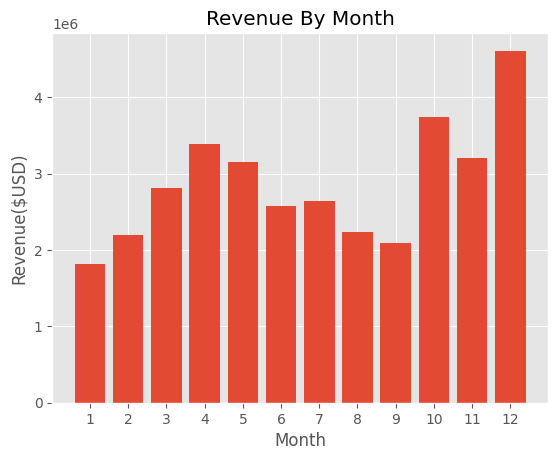

In [83]:
plt.bar(result1.index, result1["Revenue"])
plt.xticks(result1.index)
plt.xlabel("Month")
plt.ylabel("Revenue($USD)")
plt.title("Revenue By Month")
plt.show()

In [27]:
# Based on the chart of the monthly sales data, we can see that the sales figures tend to peak around the end of the year (November and December),
# and are generally higher in the second half of the year compared to the first half.

## Look at the total number of each product sold and correlation between them with avg price

Text(0, 0.5, 'Price Each ($)')

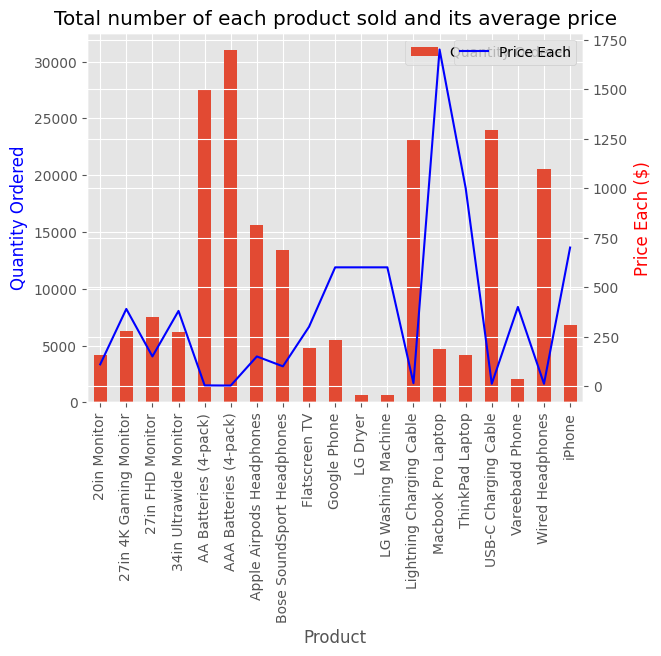

In [34]:
fig, ax = plt.subplots()
full_data[["Product", "Quantity Ordered"]].groupby("Product").sum().plot.bar(ax=ax)
ax2 = ax.twinx()

full_data[["Product", "Price Each"]].groupby("Product").mean().plot.line(ax=ax2, color="blue")
ax.set_title("Total number of each product sold and its average price")
ax.set_xlabel("Product")
ax.set_ylabel("Quantity Ordered", color='blue')
ax2.set_ylabel("Price Each ($)", color='red')

In [ ]:
# The top-selling products are charging cables (USB-C and Lightning), and batteries (AAA and AA).
# The other top-selling items include wired headphones, Apple Airpods, and Bose SoundSport headphones, indicating a demand for audio accessories.
# The LG Washing Machine and Dryer have much lower sales volumes compared to the other products, indicating that customers may be less interested in purchasing appliances online,
# or that there may be strong competition from other brands.

## What is the best country for sales?

In [35]:
country_sale = full_data[["City", "Revenue"]].groupby("City").sum()

Text(0.5, 1.0, 'Revenue By City')

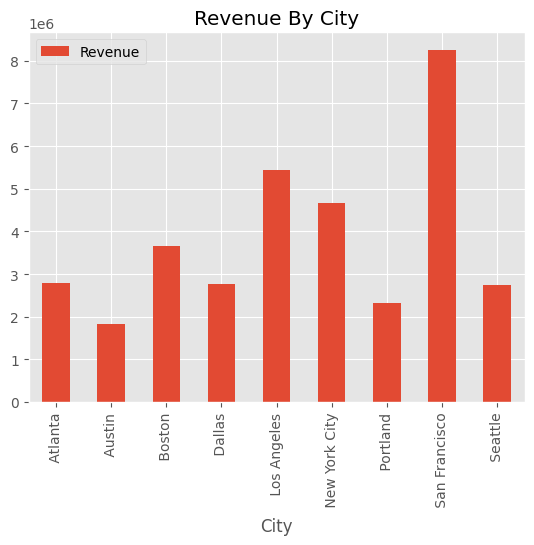

In [36]:
country_sale.plot.bar()
plt.title("Revenue By City")

In [ ]:
# From the chart, we can see that San Francisco is the city with the highest revenue, with over $8 million in sales.
# New York City, which generated just over $4.6 million in sales.
# Boston and Los Angeles are also major revenue generators, with sales figures of over $3.6 million and $5.4 million, respectively.
# The remaining cities have revenue figures ranging from just over $1.8 million (Austin) to just under $2.8 million (Dallas and Atlanta). Portland.

## What is the best time to do advertising? 

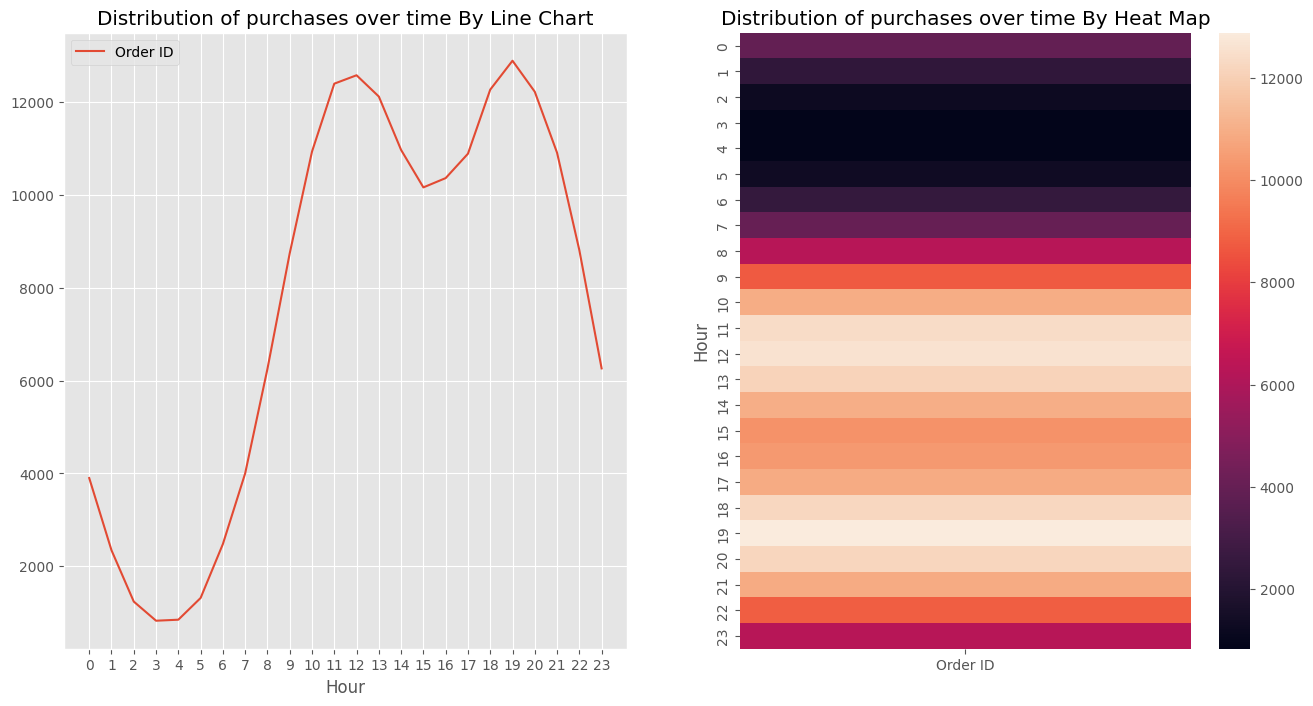

In [71]:
fg, ax = plt.subplots(1, 2, figsize=(16, 8))
result3 = full_data [["Order ID", "Hour"]].groupby("Hour").count()
result3.plot.line(ax=ax[0])
ax[0].set_xticks(full_data["Hour"].unique())
ax[0].set_title("Distribution of purchases over time By Line Chart")
sns.heatmap(result3, ax=ax[1])
ax[1].set_title("Distribution of purchases over time By Heat Map")
fig.tight_layout()

In [ ]:
# From the chart, we can see that the busiest hours for the business are from 9:00 a.m. to 8:00 p.m.,
# with the highest number of orders being placed between 11:00 a.m. and 1:00 p.m. , 18pm and 20pm
# So the best time for advertising is aroud 11-13pm and 18-20pm

## Top products most sold together 

In [39]:
df = full_data[full_data["Order ID"].duplicated(keep=False)]

In [40]:
df["Grouped"]= df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9324\3208200732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]= df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))


In [42]:
df["Grouped"].value_counts().head(10)

iPhone, Lightning Charging Cable                        886
Google Phone, USB-C Charging Cable                      857
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     79
Vareebadd Phone, Bose SoundSport Headphones              60
Name: Grouped, dtype: int64